In [ ]:
import pandas as pd

***
### ==> 1. Data Import and Data Exploration
***

### Datasets
We have 5 csv file

   - dim_date.csv  
   - dim_hotels.csv
   - dim_rooms.csv
   - fact_aggregated_bookings
   - fact_bookings.csv

**Read bookings data in a datagrame**

In [ ]:
df_bookings = pd.read_csv('/content/fact_bookings.csv')

In [ ]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [ ]:
df_bookings.shape

(22883, 12)

In [ ]:
x=list[df_bookings.room_category.unique()]

In [ ]:
print(x)

list[array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)]


In [ ]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline', nan], dtype=object)

In [ ]:
df_bookings.booking_platform.value_counts()

booking_platform
others            9442
makeyourtrip      4584
logtrip           2477
direct online     2180
tripster          1678
journey           1372
direct offline    1149
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

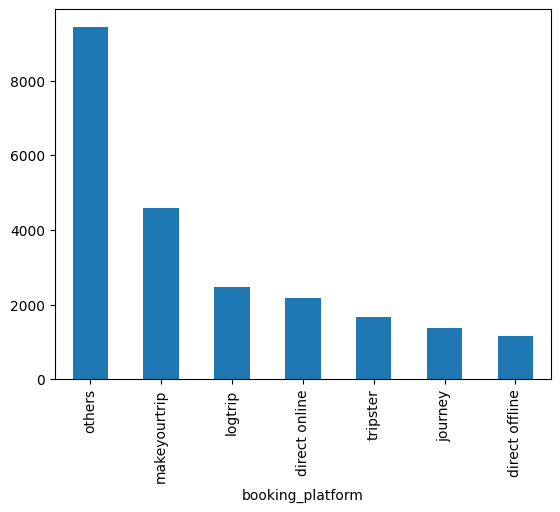

In [ ]:
df_bookings.booking_platform.value_counts().plot(kind="bar")

In [ ]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,22883.000000,22879.000000,9560.000000,2.288200e+04,22882.000000
mean,18033.557838,2.031470,3.638389,1.718962e+04,12689.787562
std,1089.623698,1.037991,1.230472,2.152890e+05,6938.267245
min,16558.000000,-12.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [ ]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22883 entries, 0 to 22882
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   booking_id         22883 non-null  object 
 1   property_id        22883 non-null  int64  
 2   booking_date       22883 non-null  object 
 3   check_in_date      22883 non-null  object 
 4   checkout_date      22882 non-null  object 
 5   no_guests          22879 non-null  float64
 6   room_category      22882 non-null  object 
 7   booking_platform   22882 non-null  object 
 8   ratings_given      9560 non-null   float64
 9   booking_status     22882 non-null  object 
 10  revenue_generated  22882 non-null  float64
 11  revenue_realized   22882 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 2.1+ MB


In [ ]:
df_bookings.isna().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            1
no_guests                4
room_category            1
booking_platform         1
ratings_given        13323
booking_status           1
revenue_generated        1
revenue_realized         1
dtype: int64

In [ ]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            1
no_guests                4
room_category            1
booking_platform         1
ratings_given        13323
booking_status           1
revenue_generated        1
revenue_realized         1
dtype: int64

In [ ]:
df_bookings.isna().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            1
no_guests                4
room_category            1
booking_platform         1
ratings_given        13323
booking_status           1
revenue_generated        1
revenue_realized         1
dtype: int64

In [ ]:
df_bookings['no_guests'].fillna(3,inplace=True)

In [ ]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22883 entries, 0 to 22882
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   booking_id         22883 non-null  object 
 1   property_id        22883 non-null  int64  
 2   booking_date       22883 non-null  object 
 3   check_in_date      22883 non-null  object 
 4   checkout_date      22882 non-null  object 
 5   no_guests          22883 non-null  float64
 6   room_category      22882 non-null  object 
 7   booking_platform   22882 non-null  object 
 8   ratings_given      9560 non-null   float64
 9   booking_status     22882 non-null  object 
 10  revenue_generated  22882 non-null  float64
 11  revenue_realized   22882 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 2.1+ MB


In [ ]:
new_data

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,3.0,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,3.0,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,3.0,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


In [ ]:
df_date = pd.read_csv('/content/dim_date.csv')
df_hotels = pd.read_csv('/content/dim_hotels.csv')
df_rooms = pd.read_csv('/content/dim_rooms.csv')
df_agg_bookings = pd.read_csv('/content/fact_aggregated_bookings.csv')

In [ ]:
df_hotels.shape

(25, 4)

In [ ]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [ ]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

<Axes: xlabel='city'>

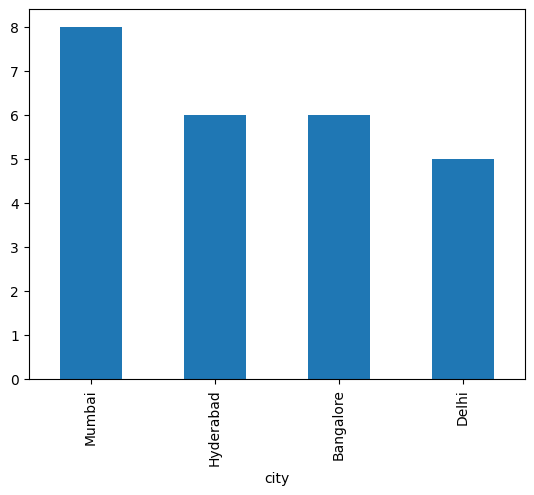

In [ ]:
df_hotels.city.value_counts().plot(kind="bar")

In [ ]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul 22,W 31,weekeday
88,28-Jul-22,Jul 22,W 31,weekeday
89,29-Jul-22,Jul 22,W 31,weekeday
90,30-Jul-22,Jul 22,W 31,weekend


In [ ]:
df_hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [ ]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [ ]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30.0
1,19562,01-May-22,RT1,28,30.0
2,19563,01-May-22,RT1,23,30.0
4,16558,01-May-22,RT1,18,19.0
5,17560,01-May-22,RT1,28,40.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


## Q. Find out unique property ids in aggregate bookings dataset

In [ ]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 16558, 17560, 19558, 19560, 16560, 16561,
       16562, 17559, 17563, 18558, 18559, 18561, 18562, 18563, 19559,
       19561, 17564, 17561, 17558, 16563, 17562, 18560])

## Q. Find out total bookings per property_id

In [ ]:
x = pd.DataFrame(df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

SyntaxError: incomplete input (<ipython-input-1-7f49ce34e667>, line 1)

## Q Find out days on which bookings are greater than capacity

In [ ]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity


## Q. Find out properties that have highest capacity

In [ ]:
df_agg_bookings.capacity.max()

50.0

In [ ]:
df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,01-May-22,RT2,38,50.0
128,17558,02-May-22,RT2,27,50.0
229,17558,03-May-22,RT2,26,50.0
328,17558,04-May-22,RT2,27,50.0
428,17558,05-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


***
### ==> 2. Data Cleaning
***

In [ ]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,22872.000000,22872.000000,9556.000000,22872.000000,22872.000000
mean,18033.785677,2.033578,3.638447,14908.739944,12690.290705
std,1089.635177,1.027628,1.230258,6451.227663,6937.776364
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


**(1) Clean invalid guests**

In [ ]:
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100.0,3640.0
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920.0,10920.0
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100.0,9100.0
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100.0,3640.0
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100.0,9100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22877,May152218560RT33,18560,9/5/2022,15-05-22,16-05-22,1.0,RT3,others,1.0,Checked Out,12000.0,12000.0
22878,May152218560RT34,18560,11/5/2022,15-05-22,16-05-22,2.0,RT3,others,NaN,No Show,12000.0,12000.0
22879,May152218560RT35,18560,12/5/2022,15-05-22,16-05-22,1.0,RT3,makeyourtrip,NaN,Checked Out,12000.0,12000.0
22880,May152218560RT36,18560,8/5/2022,15-05-22,16-05-22,1.0,RT3,tripster,NaN,Checked Out,12000.0,12000.0


In [ ]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


As you can see above, number of guests having less than zero value represents data error. We can ignore these records.

In [ ]:
df_bookings = df_bookings[df_bookings.no_guests>0]

In [ ]:
df_bookings.shape

(22872, 12)

**(2) Outlier removal in revenue generated**

In [ ]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500.0, 45220.0)

In [ ]:
df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.median()

(14908.739944036377, 13500.0)

In [ ]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [ ]:
higher_limit = avg + 3*std
higher_limit

34262.422932090005

In [ ]:
lower_limit = avg - 3*std
lower_limit

-4444.943044017247

In [ ]:
df_bookings[df_bookings.revenue_generated<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [ ]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760.0,38760.0
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220.0,45220.0
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530.0,35530.0
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990.0,41990.0
153,May012216559RT417,16559,30-04-22,1/5/2022,2/5/2022,4.0,RT4,others,NaN,Cancelled,38760.0,15504.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22578,May152217561RT41,17561,15-05-22,15-05-22,17-05-22,3.0,RT4,logtrip,NaN,Checked Out,35530.0,35530.0
22579,May152217561RT42,17561,11/5/2022,15-05-22,17-05-22,6.0,RT4,others,NaN,Checked Out,45220.0,45220.0
22620,May152217562RT41,17562,11/5/2022,15-05-22,21-05-22,5.0,RT4,makeyourtrip,NaN,Checked Out,41990.0,41990.0
22687,May152217563RT42,17563,15-05-22,15-05-22,16-05-22,5.0,RT4,direct offline,NaN,Cancelled,41990.0,16796.0


In [ ]:
df_bookings = df_bookings[df_bookings.revenue_generated<=higher_limit]
df_bookings.shape

(22617, 12)

In [ ]:
df_bookings.revenue_realized.describe()

count    22617.000000
mean     12465.638458
std       6557.624950
min       2600.000000
25%       7600.000000
50%      11400.000000
75%      15300.000000
max      34200.000000
Name: revenue_realized, dtype: float64

In [ ]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

32138.513306694986

In [ ]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
140,May012216559RT44,16559,28-04-22,1/5/2022,5/5/2022,2.0,RT4,others,NaN,Checked Out,32300.0,32300.0
141,May012216559RT45,16559,28-04-22,1/5/2022,4/5/2022,2.0,RT4,others,5.0,Checked Out,32300.0,32300.0
144,May012216559RT48,16559,26-04-22,1/5/2022,2/5/2022,2.0,RT4,makeyourtrip,5.0,Checked Out,32300.0,32300.0
145,May012216559RT49,16559,28-04-22,1/5/2022,3/5/2022,2.0,RT4,others,NaN,Checked Out,32300.0,32300.0
146,May012216559RT410,16559,30-04-22,1/5/2022,6/5/2022,2.0,RT4,logtrip,NaN,No Show,32300.0,32300.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22692,May152217563RT47,17563,13-05-22,15-05-22,18-05-22,2.0,RT4,others,NaN,Checked Out,32300.0,32300.0
22694,May152217563RT49,17563,15-05-22,15-05-22,16-05-22,1.0,RT4,journey,5.0,Checked Out,32300.0,32300.0
22695,May152217563RT410,17563,14-05-22,15-05-22,16-05-22,2.0,RT4,others,NaN,Checked Out,32300.0,32300.0
22696,May152217563RT411,17563,14-05-22,15-05-22,16-05-22,1.0,RT4,tripster,5.0,Checked Out,32300.0,32300.0


One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types

In [ ]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

count     2466.000000
mean     22574.727494
std       8317.125388
min       7600.000000
25%      19000.000000
50%      22800.000000
75%      31350.000000
max      34200.000000
Name: revenue_realized, dtype: float64

In [ ]:
# mean + 3*standard deviation
23439+3*9048

50583

Here higher limit comes to be 50583 and in our dataframe above we can see that max value for revenue realized is 45220. Hence we can conclude that there is no outlier and we don't need to do any data cleaning on this particular column

In [ ]:
df_bookings[df_bookings.booking_id=="May012216558RT213"]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
30,May012216558RT213,16558,29-04-22,1/5/2022,2/5/2022,3.0,RT2,logtrip,4.0,Checked Out,12600.0,12600.0


In [ ]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        13316
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc

**Exercise-1. In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)**

In [ ]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [ ]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity


In [ ]:
df_agg_bookings.capacity.median()

25.0

In [ ]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)

In [ ]:
df_agg_bookings.loc[[5,15]]

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
5,17560,01-May-22,RT1,28,40.0,7000.0
15,17563,01-May-22,RT1,21,25.0,8400.0


**Exercise-2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records**

In [ ]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity


In [ ]:
df_agg_bookings.shape

(9192, 5)

In [ ]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]
df_agg_bookings.shape

(9192, 5)

***
### ==> 3. Data Transformation
***

**Create occupancy percentage column**

In [ ]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30.0,8333.0
1,19562,01-May-22,RT1,28,30.0,9333.0
2,19563,01-May-22,RT1,23,30.0,7667.0


In [ ]:
df_agg_bookings['occ_pct'] = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)

In [ ]:
new_col = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)
df_agg_bookings = df_agg_bookings.assign(occ_pct=new_col.values)
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30.0,0.833333
1,19562,01-May-22,RT1,28,30.0,0.933333
2,19563,01-May-22,RT1,23,30.0,0.766667


In [ ]:
#Convert it to a percentage value
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x*100, 2))
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30.0,83.33
1,19562,01-May-22,RT1,28,30.0,93.33
2,19563,01-May-22,RT1,23,30.0,76.67


In [ ]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100.0,3640.0
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920.0,10920.0
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100.0,9100.0
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100.0,3640.0
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100.0,9100.0


In [ ]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9192 entries, 0 to 9199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9192 non-null   int64  
 1   check_in_date        9192 non-null   object 
 2   room_category        9192 non-null   object 
 3   successful_bookings  9192 non-null   int64  
 4   capacity             9192 non-null   float64
 5   occ_pct              9192 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 760.7+ KB


There are various types of data transformations that you may have to perform based on the need. Few examples of data transformations are,

1. Creating new columns
1. Normalization
1. Merging data
1. Aggregation

***
### ==> 4. Insights Generation
***

**1. What is an average occupancy rate in each of the room categories?**

In [ ]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30.0,83.33
1,19562,01-May-22,RT1,28,30.0,93.33
2,19563,01-May-22,RT1,23,30.0,76.67


In [ ]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean()

room_category
RT1    5788.082825
RT2    5800.975642
RT3    5802.821304
RT4    5927.792518
Name: occ_pct, dtype: float64

I don't understand RT1, RT2 etc. Print room categories such as Standard, Premium, Elite etc along with average occupancy percentage

In [ ]:
df = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,01-May-22,RT1,25,30.0,8333.0,RT1,Standard
1,19562,01-May-22,RT1,28,30.0,9333.0,RT1,Standard
2,19563,01-May-22,RT1,23,30.0,7667.0,RT1,Standard
3,16558,01-May-22,RT1,18,19.0,9474.0,RT1,Standard


In [ ]:
df.drop("room_id",axis=1, inplace=True)
df.head(4)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard


In [ ]:
df.groupby("room_class")["occ_pct"].mean()

room_class
Elite           58.009756
Premium         58.028213
Presidential    59.277925
Standard        57.889643
Name: occ_pct, dtype: float64

In [ ]:
df[df.room_class=="Standard"].occ_pct.mean()

57.88964285714285

**2. Print average occupancy rate per city**

In [ ]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [ ]:
df = pd.merge(df, df_hotels, on="property_id")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,3-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai


In [ ]:
df.groupby("city")["occ_pct"].mean()

city
Bangalore    56.332376
Delhi        61.507341
Hyderabad    58.120652
Mumbai       57.909181
Name: occ_pct, dtype: float64

**3. When was the occupancy better? Weekday or Weekend?**

In [ ]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [ ]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [ ]:
df.groupby("day_type")["occ_pct"].mean().round(2)

NameError: name 'df' is not defined

**4: In the month of June, what is the occupancy for different cities**

In [ ]:
df_june_22 = df[df["mmm yy"]=="Jun 22"]
df_june_22.head(4)

NameError: name 'df' is not defined

In [ ]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.44
Name: occ_pct, dtype: float64

<AxesSubplot: xlabel='city'>

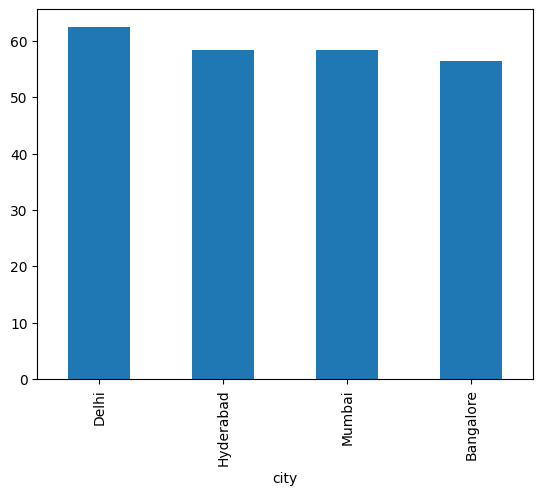

In [ ]:
df_june_22.groupby('city')['occ_pct'].mean().round(2).sort_values(ascending=False).plot(kind="bar")

**5: We got new data for the month of august. Append that to existing data**

In [ ]:
df_august = pd.read_csv("datasets/new_data_august.csv")
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [ ]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [ ]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [ ]:
df_august.shape

(7, 13)

In [ ]:
df.shape

(6497, 14)

In [ ]:
latest_df = pd.concat([df, df_august], ignore_index = True, axis = 0)
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6494,16563,31-Jul-22,RT2,32,38.0,84.21,Elite,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend,NaN
6495,16563,31-Jul-22,RT3,14,20.0,70.00,Premium,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend,NaN
6496,16563,31-Jul-22,RT4,13,18.0,72.22,Presidential,Atliq Palace,Business,Delhi,31-Jul-22,Jul 22,W 32,weekend,NaN
6497,16559,01-Aug-22,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,100.00
6498,19562,01-Aug-22,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,70.00
6499,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6500,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6501,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6502,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6503,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [ ]:
latest_df.shape

(6504, 15)

Check this post for codebasics resume project challange winner entry: https://www.linkedin.com/posts/ashishbabaria_codebasicsresumeprojectchallenge-data-powerbi-activity-6977940034414886914-dmoJ?utm_source=share&utm_medium=member_desktop

**6. Print revenue realized per city**

In [ ]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [ ]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [ ]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [ ]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

**7. Print month by month revenue**

In [ ]:
df_date.head(3)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday


In [ ]:
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [ ]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [ ]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [ ]:
df_date["date"] = pd.to_datetime(df_date["date"])
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [ ]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [ ]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"])
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,2022-01-05,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [ ]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [ ]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

**Exercise-1. Print revenue realized per hotel type**

In [ ]:
df_bookings_all.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [ ]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().round(2).sort_values()

property_name
Atliq Seasons     66086735
Atliq Grands     211462134
Atliq Bay        259996918
Atliq Blu        260851922
Atliq City       285798439
Atliq Palace     304081863
Atliq Exotica    320258588
Name: revenue_realized, dtype: int64

**Exercise-2 Print average rating per city**

In [ ]:
df_bookings_all.groupby("city")["ratings_given"].mean().round(2)

city
Bangalore    3.41
Delhi        3.78
Hyderabad    3.66
Mumbai       3.65
Name: ratings_given, dtype: float64

**Exercise-3 Print a pie chart of revenue realized per booking platform**

<AxesSubplot: ylabel='revenue_realized'>

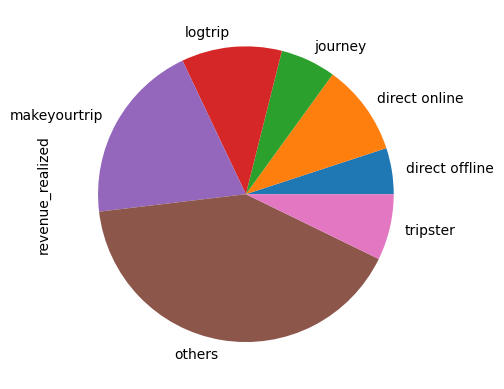

In [ ]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")